
# <p style="text-align: center;">MIS 382N: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Wed, September 14</p>



In [34]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import axes3d
from scipy.stats import multivariate_normal
import math
from pandas import Series, DataFrame
import pandas as pd 
%pylab inline
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Question 1: Applications of machine learning (10 pts)

The article "Of Prediction and Policy", posted on Canvas under Modules --> Additional Resources, mentions several applications of machine learning. Pick any one of the works mentioned in this short article and:

1. (2 pts) Find at least one technical article that describes the work and provide the  citation(s). Very easy to do by Googling the names/institutions.
2. (4pts) In a few sentences describe the methodology/approach that was used.
3. (2 pts) Summarize in a couple of sentences what you liked about this work, and
4. (2 pts) Also summarize in a couple of sentences any concerns you may have about the work or its  application to societal problems.


## Answer



**1.Identifying Police Officers at Risk of Adverse Events**
   
   Citations: https://dssg.uchicago.edu/wp-content/uploads/2016/04/identifying-police-officers-3.pdf


**2.Methodology:**  

The Charlotte-Mecklenburg Police Department has developed a machine learning system to flag police officers who are at risk for adverse events such as deadly shootings or instances of racial profiling. The data connsisted of almost all employee and event records collected by CMPD ro manage its day-to-day operations. Data had information like Internal Affairs data, Dispatch Data, criminal complaints, Citations, Arrests, Employee records, Training, Neighborhood, Existing EIS Flags etc. 

The model was built as a binary classification problem where the class was whether a given officer will have an adverse event within one year in future. At officer level, behavioral features were generated by aggregating record of incidents by each officer. Within the incidents, incidents that were most likely to lead to officer's stress were tracked such as suicides, narcotics, young children, domestic violence. Also, number of credit hours spent by the officer in training of topic area. Time series features to capture sudden change in behavior and static features like demographics, height, weight, time on force were also recorded. 

Best performing binary classfication model came out to be Random Forest that used 50 estimators and estimated 8-9% officers having an adverse effect in a span of one year. This model was able to flag 12% more high-risk officers with 32% fewer false negatives.

**3.What I liked:** 

A wide variety of data was collected from the field experts and police departments e.g. officer level, dispatch level, neighborhood level. For modeling, AdaBoost,Random Forests, Logistic Regression, and Support Vector
Machines were tried. Also, Random searches over a standard hyperparameter space using 3-fold cross-validation were used to tune each model. This ensured that the robustness of the model. Moreover, other than Random Forest, an exploratory analysis was conducted for dispatch level prediction. Environmental factors of a given event could play a significant role in determining whether an event “turns adverse”, in addition to the characteristics of officers involved. These were studied under the exploratory analysis as well. It was a detailed study with carefully defined assumptions and using a variety of modeling techniques to find the best fit for making predictions.


**4.Concerns:** 

Since the model was built using Random Forest, the interpretation is very difficult. This would make it hard to justify to the emmployees why they were not sent for a particular dispatch. Also, since data was limited to one police department, the results will not hold correct for other police departments. Lastly, the data correctness is not ensured since it is being manually entered by the officers during busy days. This can lead to errorsome predictions. 

# Question 2: Maximum likelihood estimate (10 pts)

Consider the following univariate probability distribution 
$$p(x|a,b) = \frac{x^{a-1}}{\Gamma(a)b^a}exp(-\frac{x}{b}),$$ for $x \geq 0$ and $a,b > 0.  ~~ \Gamma(a)$ is a normalization term. 

You are given N i.i.d. data points drawn from this distribution. Derive the MLE estimate for $b$, in terms of $x_1, x_2, \ldots x_N$ and $a$.

## Answer



#### Log Likelihood Maximization ###

$Probability(likelihood) = \prod_{i=1}^Np(x_i|a,b)$

$Log- likelihood =  	\sum_{i=1}^N\log p(x_i|a,b)$

$LL = \sum_{i=1}^N\log\frac{x_i^{a-1}}{\Gamma(a)b^a}exp(-\frac{x_i}{b})$
 
$LL = \sum_{i=1}^N(\log {x_i^{a-1}} -log {\Gamma(a)b^a} -\frac{x_i}{b}) $

$LL = \sum_{i=1}^N(\log {x_i^{a-1}} -log \Gamma(a)-a logb -\frac{x_i}{b}) $

$LL = (a-1)(\sum_{i=1}^N\log {x_i}) - N log \Gamma(a)-N a\log b -\frac{\sum_{i=1}^N{x_i}}{b}) $

$\frac{\partial LL}{\partial b}= 0-0-\frac{N a}{b}+ \frac{\sum_{i=1}^N{x_i}}{b^2}$

For Maximum Likelihood, $\frac{\partial LL}{\partial b} =0$

$(\sum_{i=1}^N{x_i}) - Nab =0 $

$ b = \frac{\sum_{i=1}^N{x_i}}{N a}$

##### Checking for maximum using double derivative #####

$\frac{\partial^2LL}{\partial b^2}= (-2) \frac{\sum_{i=1}^N{x_i}}{b^3} + \frac{N a}{b^2} $

Substituting 
$ b = \frac{\sum_{i=1}^N{x_i}}{N a}$

$\frac{\partial^2LL}{\partial b^2}= \frac{N^2 a^2 (1-2Na)}{(\sum_{i=1}^N{x_i})^2}$
###### The quantity (1-2Na) is less than 0. Thus, second derivative will be negative and the likelihood will be maximized at $b = \frac{\sum_{i=1}^N{x_i}}{N a}$ ######

# Question 3: Conditional Distributions (10 pts)

The joint pdf of two random  variables $X_1$ and $X_2$ is  constant (i.e., the joint distribution is uniform) within the area shown below, and zero outside of it. Given this joint distribution, obtain  the following two univariate distributions from it. It is not necessary to write the equations, if the distributions can be plotted / described in full detail.

a. (6 pts) The marginal distribution of $X_1$, $p_{X_1}(x_1)$

b. (4 pts) The conditional distribution $p_{X_2|X_1}(x_2 \,|\, x_1 = 0.5)$

<img src="hw1p3_questionpic.png">

## Answer



**a) The probability distribution of marginal probability of X1 = Joint probability distribution of (X1,X2) integrated over all values of X2, which will generate the following plot.**

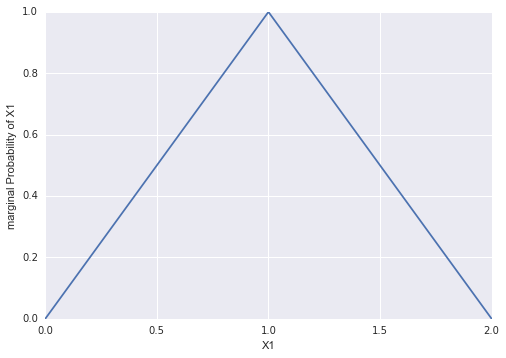

In [17]:
x = [0,0.5,1,1.5,2]
y=[]
for i in range(len(x)):
    if x[i]<=1:
        y.append(x[i])
    else:
        y.append(-1*x[i] +2)

plot(x,y)
ylabel('marginal Probability of X1')
xlabel('X1')
    

Given the joint distribution, for any value of x1, we need to take the distribution across all values of x2. At any given x1, say x1= 0.5, x2=[0, 1]; x1=1, x2=[0,2]; x1=0.5,x2=[1,2]; and x1=2, x2=2. The highest value of the distribution occurs at x1=1 and it decreases on either side of x1=1. Thus, the shape of the marginal distribution will be a triangle as shown above. Also, the area under the marginal distribution curve should be 1. With the width of triangle=2, the height becomes 1. 

**b). Fixing X1= 0.5, integration of P(x1,x2) over x1 will give the distribution of P(x2|x1=0.5). Since the joint probability is uniform in the highlighted region, the conditional probability of X2 given x1=0.5 will be a step function as show below:**

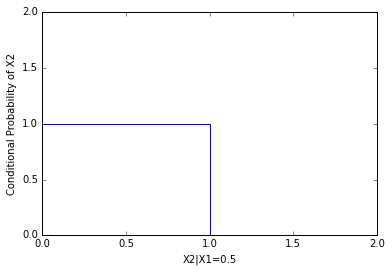

In [109]:
x = [0,0.5,1,1.5,2]
y=[]
for i in range(len(x)):
    if x[i]<=1:
        y.append(1)
    elif x[i]>1:
        y.append(0)
step(x,y)
plt.ylim((0,2))
ylabel('Conditional Probability of X2')
xlabel('X2|X1=0.5')

To find the conditional probability of x2 at x1=0.5, we slice the joint distribution at x1=0.5. Since the joint distribution is uniform, the distibution of x2 across this slice will also be uniform. Also, x2 varies from 0 to 1 at x1=0.5. Thus, the above figure represents the conditional distribution of x2 given x1=0.5.

# Question 4: Bivariate Normal Distribution (20 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0$
2. $\sigma_x^2 = 4; \sigma_y^2 = 16; \rho = 0.5$

a. (8 pts) Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (6 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (6 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

## Answer



**Covariance Matrices**
In the below covariance matrix,

\begin{equation} \left[ \begin{array}{cc} \sigma_x^2 & \sigma_x\sigma_y\rho \\ \sigma_x\sigma_y\rho & \sigma_y^2 \end{array} \right] \end{equation}

Diagonal terms are given by (correlation) \* (standard deviation of X) * (standard deviation of Y)

### a. ###

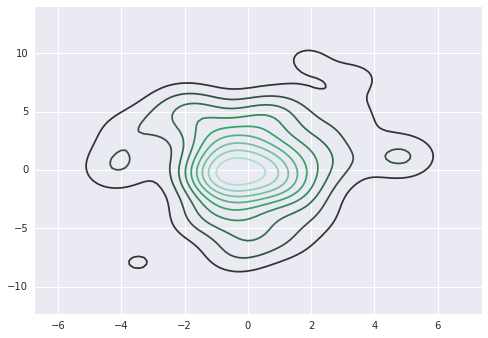

In [14]:
mean, cov = [0, 0], [(4, 0), (0, 16)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, y)

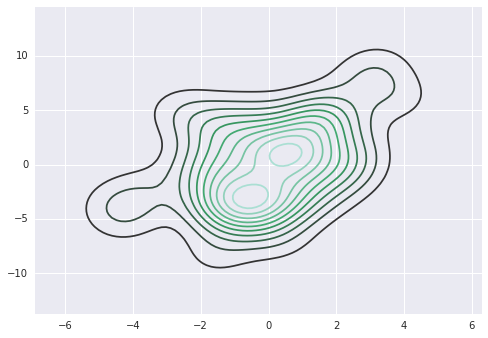

In [125]:
mean, cov = [0, 0], [(4, 4), (4, 16)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, y)

### b. ###

For the below 3-D plots, z axis is probabilty distribution function which is viewed at two different angles

In [23]:
## function for plotting 3-d distribution for 2 different angles ##
def plot_3d(x,y,mean,cov):
    var = multivariate_normal(mean=mean,cov=cov)
    X,Y=np.meshgrid(x,y)
    z=var.pdf(zip(X.ravel(),Y.ravel())) ## probabilty distribution fucntion
    Z=z.reshape(X.shape)
    fig=plt.figure()
    ax=fig.add_subplot(121,projection='3d')
    ax.plot_wireframe(X,Y,Z,rstride=1,cstride=1)
    ax.view_init(30,60) ## First view
    ax=fig.add_subplot(122,projection='3d')
    ax.plot_wireframe(X,Y,Z,rstride=1,cstride=1)
    ax.view_init(10,150) ## Second view
    plt.tight_layout()
    fig.set_tight_layout(True)
    plt.draw()
    return
    

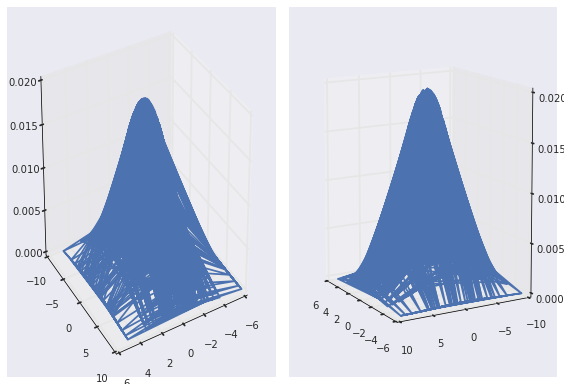

In [25]:
## Distribution 1: ##
mean, cov = [0, 0], [(4, 0), (0, 16)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
plot_3d(x,y,mean, cov)

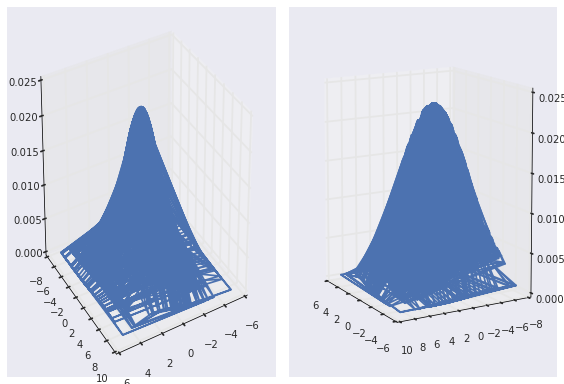

In [24]:
## Distribution 2: ##

mean, cov = [0, 0], [(4, 4), (4, 16)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
plot_3d(x,y,mean, cov)

### c. ###

For a rotation of -45 degrees using rotation matrix, below are the 3-D plots for the two distributions

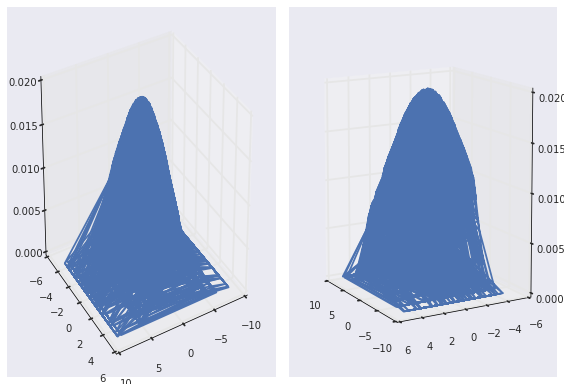

In [27]:
## Distribution 1 ##
mean, cov = [0, 0], [(4, 0), (0, 16)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T

## Rotation Matrix ##
x1=x*math.cos(-45)-y*sin(-45)
y1=x*math.sin(-45)+y*cos(-45)
plot_3d(x1,y1,mean, cov)

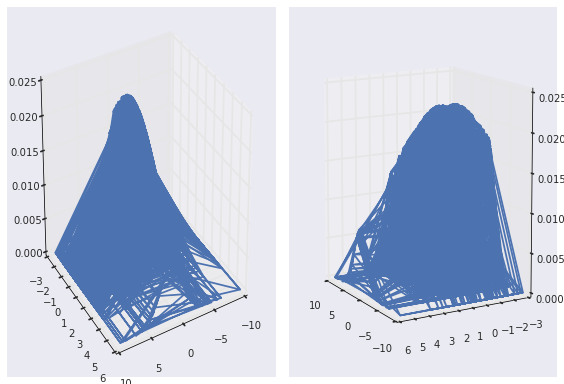

In [28]:
## Distribution 2 ##
mean, cov = [0, 0], [(4, 4), (4, 16)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T

## Rotation Matrix ##
x2=x*math.cos(-45)-y*sin(-45)
y2=x*math.sin(-45)+y*cos(-45)
plot_3d(x2,y2,mean, cov)

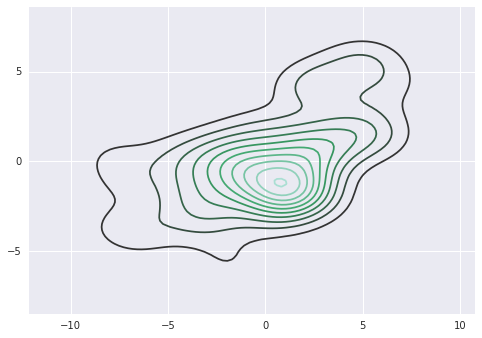

In [15]:
## Rotated Contour plots for Distribution 1 ##
ax = sns.kdeplot(x1, y1)

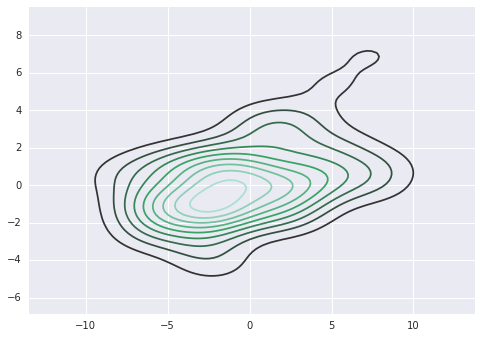

In [16]:
## Rotated contour plot for Distribution 2 ##
ax = sns.kdeplot(x2, y2)

# Question 5: MLR using scikit-learn (20 pts)

Consider the dataset (Advertising.csv), which has the following variables:

  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)


We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

1. (2 pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows. (Use shape and head commands in python)
2. (4 pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.
2. (2 pts) Fit a simple linear regression of SALES on TV. What is the regression coefficient for TV and what is its interpretation?
3. Split the data randomly into a training and test set (keep 1/3rd of the data for test).

  * (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. 
  * (2 pts) Report the MSE obtained on train data. How much does this increase when you score your
model on test data?
  * (2 pts) Report the coefficients obtained by your model.
  * (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.


## Answer



In [31]:
ad_data = pd.read_csv("/Advertising.csv") ## Read data 

### 1. ###

In [15]:
print ad_data.shape
print ad_data.head(5)

(200, 5)
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


### 2. ###

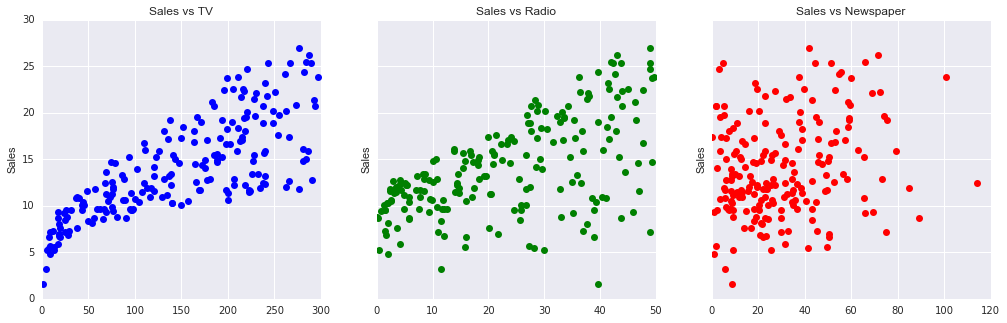

In [32]:
fig, (ax1, ax2, ax3) = subplots(nrows=1,
ncols=3,
sharex=False,
sharey=True,
figsize=(17, 5))
# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.plot(ad_data['TV'], ad_data['Sales'], marker='o', color='blue', linestyle='None')
ax1.set_title('Sales vs TV')
ax1.set_ylabel('Sales')
ax2.plot(ad_data['Radio'], ad_data['Sales'], marker='o', color='green', linestyle='None')
ax2.set_title('Sales vs Radio')
ax2.set_ylabel('Sales')
ax3.plot(ad_data['Newspaper'], ad_data['Sales'], marker='o', color='red', linestyle='None')
ax3.set_title('Sales vs Newspaper')
ax3.set_ylabel('Sales')
show()

* Sales increase as Dollars spent on TV increase. The Sales seem to be exponentially growing with increase in dollars spent on TV advertising
* Sales increase with increase in dollar spent on Radio to a certain extent. 
* Sales do not seem to have any trend by the number of dollars spent on Newspaper advertising

### 3. ###

/Users/nikitalakhotia/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


Intercept = 7.03259354913
Slope = 0.047536640433


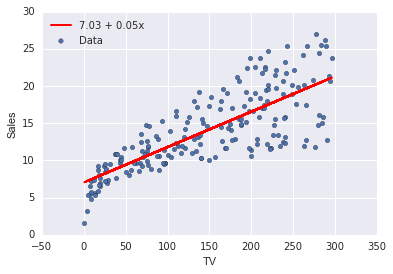

In [33]:
reg = pd.ols(x=ad_data['TV'], y=ad_data['Sales'])
print 'Intercept =', reg.beta['intercept']
print 'Slope =', reg.beta['x']

y_expected = reg.beta['intercept'] + ad_data['TV'] * reg.beta['x']

# Nicely get the regression coefficient and slope in one string
regression_formula = '{0:.2f} + {1:.2f}x'.format(reg.beta['intercept'], reg.beta['x'])

# Now plot both the true wife heights and the expected heights
scatter(ad_data['TV'], ad_data['Sales'], label='Data')
plot(ad_data['TV'], y_expected, linewidth=2, color='red', label=regression_formula)
xlabel('TV')
ylabel('Sales')
legend(loc='upper left')

A coefficient of 0.047 means that a thousand dollar increase in the investment of TV advertising will lead to increased sales of 1000 widgets.

### 4. ###
#### (i) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error.


In [36]:
train_set, test_set = train_test_split(ad_data, test_size = 0.33, random_state=128)

In [37]:
y, X = dmatrices('Sales ~ TV + Radio + Newspaper', data=train_set, return_type='dataframe')
y_test, X_test = dmatrices('Sales ~ TV + Radio + Newspaper', data=test_set, return_type='dataframe')


In [38]:
model = sm.OLS(y,X)
result = model.fit()

Y_test_pred = result.params['Intercept']+ result.params['TV'] * test_set['TV']+ result.params['Radio'] * test_set['Radio']+ result.params['Newspaper'] * test_set['Newspaper']
print math.sqrt(mean(pow((Y_test_pred - test_set['Sales']),2)))
print mean(pow((Y_test_pred - test_set['Sales']),2))

1.65347688049
2.73398579431


### (ii) ###

Report the MSE obtained on train data. How much does this increase when you score your model on test data?
    
    
MSE On Train Data : 

In [39]:
Y_train_pred = result.params['Intercept']+ result.params['TV'] * train_set['TV']+ result.params['Radio'] * train_set['Radio']+ result.params['Newspaper'] * train_set['Newspaper']
mean(pow((Y_train_pred - train_set['Sales']),2))

2.8156058565807585

MSE on Training Data is slightly higher or equal to the MSE obtianed on Test Data, which means the model is not overfitting the training data.

### (iii) ###

Report the coefficients obtained by your model.

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     361.3
Date:                Mon, 12 Sep 2016   Prob (F-statistic):           7.48e-63
Time:                        19:39:35   Log-Likelihood:                -259.49
No. Observations:                 134   AIC:                             527.0
Df Residuals:                     130   BIC:                             538.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9370      0.393      7.465      0.000         2.159     3.715
TV             0.0461      0.002     26.927      0.000         0.043     0.050
Radio          0.1865      0.011     17.208      0.000         0.165     0.208
Newspaper     -0.0024      0.008     -0.320      0.749        -0.017     0.012
==============================================================================
Omnibus:                       53.205   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.672
Skew:                          -1.509   Prob(JB):                     1.29e-35
Kurtosis:                       7.435   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P- Value for Newspaper is very high. Thus, it's an insignificant variable.

### (iv) ###

Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer

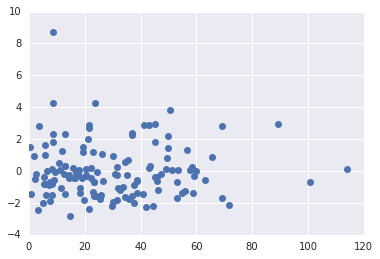

In [49]:
Res = Y_train_pred - train_set['Sales']
plot(train_set['Newspaper'],Res, 'o')

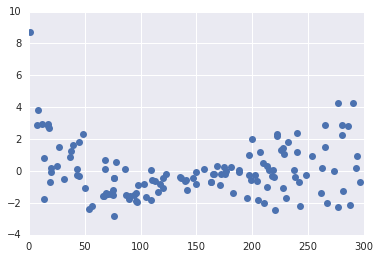

In [50]:
plot(train_set['TV'],Res, 'o')

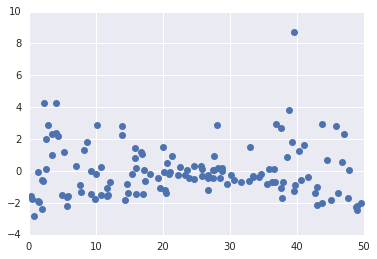

In [52]:
plot(train_set['Radio'],Res, 'o')

In above residual plots, it is evident that residual plot against TV and Radio dollar spend still has some pattern.

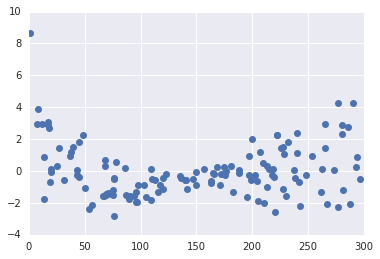

In [55]:
### Modeling without NewsPaper ###
y, X = dmatrices('Sales ~ TV + Radio', data=train_set, return_type='dataframe')
model = sm.OLS(y,X)
result = model.fit()
Y_train_pred = result.params['Intercept']+ result.params['TV'] * train_set['TV']+ result.params['Radio'] * train_set['Radio']

Res = Y_train_pred - train_set['Sales']
plot(train_set['TV'],Res, 'o')

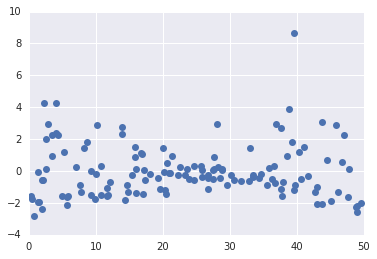

In [56]:
plot(train_set['Radio'],Res, 'o')

Even after the removal of insignificant variable Newspaper, the residual has some pattern against TV and Radio dollars spent. This means all the dependency of Sales on TV and Radio hasn't been extracted out yet. Thus, we can consider non-linear transformations of TV and Radio Dollars Spent.

# Question 6: Illustrating the curse of dimensionality (10 pts)

For a hypersphere of radius $a$ in $d$ dimensions, the volume is related to the surface area of a unit hypersphere (S) as
    $$ V = \frac{S \times a^d}{d}.$$


1. (6 pts) Use this result to show that the fraction of the volume which lies at values of the radius between $a - \epsilon$ and $a$, where $0 < \epsilon < a$, is given by
$f = 1 - (1 - \epsilon/a)^d$. Hence, show that for any fixed $\epsilon$, no matter how small, this fraction tends to 1 as $d \rightarrow \infty$.
2. (4 pts) Evaluate the ratio $f$ numerically, with $\epsilon/a = 0.01$, for the cases $d$ = 2, 10, and 1000.


This problem shows that if data are randomly distributed within a very high-dimensional hypersphere, most of the mass is near the surface and there is very little of it near the "core". Thus, there are few "representative" points.

## Answer



#### 1. ####

$V_a = \frac{S \times a^d}{d}$

$V_{a-\epsilon} = \frac{S \times (a-\epsilon)^d}{d}$

$fraction(f) = (V_a - V_{a-\epsilon})/V_a$

$fraction(f) = (\frac{S \times a^d}{d} - \frac{S \times (a-\epsilon)^d}{d})/\frac{S \times a^d}{d} = ( a^d -  (a-\epsilon)^d)/{a^d} = ( 1 -  (\frac{a-\epsilon}{a})^d) = 1 -  (1-{\epsilon}/{a})^d$

As $0 < \epsilon < a$, $\epsilon /a $ will be a fraction. Thus, (1- fraction) raised to power infinity leads to infinitely small value ~ zero. Hence, f tends to 1 as d tends to infinity. 

#### 2. ####

In [65]:
r = 0.01
for d in [2,10,1000]:
    print "Ratio f for d="+str(d)+" is "+ str((1-pow((1-r),d)))

Ratio f for d=2 is 0.0199
Ratio f for d=10 is 0.0956179249912
Ratio f for d=1000 is 0.999956828753


In the above results, it is evident that as dimensions are increasing, the fraction tends to 1 which proves that most of the mass is near the surface and there is very little of it near the core.